<a href="https://colab.research.google.com/github/DanielOMartins/Estudos/blob/master/IA_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

from google.colab import drive
import os

#drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/Colab Notebooks")

allMoviesFile = os.path.join("movies.csv")

print(allMoviesFile)

movies.csv


In [ ]:
movies_df = pd.read_csv(allMoviesFile)
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


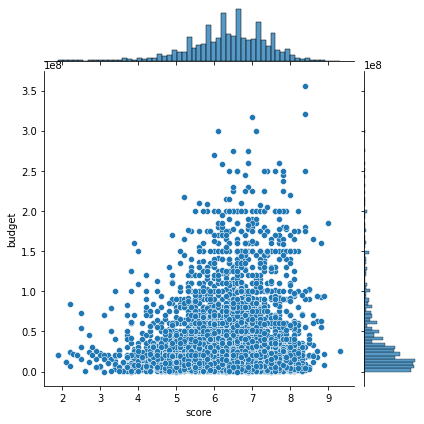

In [ ]:
sns.jointplot(x='score',y='budget',data=movies_df)

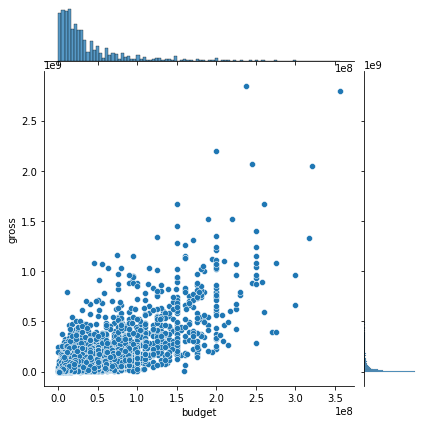

In [ ]:
sns.jointplot(x='budget',y='gross',data=movies_df)

In [ ]:
movies_df=movies_df.dropna(axis=0)

# Reset index after drop
movies_df=movies_df.dropna().reset_index(drop=True)

In [ ]:
X = movies_df[['votes','budget', 'gross', 'runtime']]
y = movies_df['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)
lm = LinearRegression()
lm.fit(X_train,y_train)

print(lm.intercept_)

4.462915211805808


O valor **intercept** é quando todos os valores que definimos nas colunas preditoras estão em 0. Significa que se todos os valores estiverem zerados, ainda podemos obter uma pontuação de 4,5.

O que não faz muito sentido, pois se não tivermos votos ou um filme de 0 minutos, seria impossível se obter qualquer valor como nota.



In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
votes,2.285745e-06
budget,-6.391924e-09
gross,3.378907e-10
runtime,1.720832e-02


Analisando os coeficientes a cima, podemos concluir como coluna influência na pontuação.

*   Mantendo todos os outros parâmetros fixos, um aumento de 1 unidade na **Votes** está associado a um **aumento na pontuação de 2,2**.

*   Mantendo todos os outros parâmetros fixos, um aumento de 1 unidade na **Budget** está associado a um **diminuição na pontuação de 6,4**.

*   Mantendo todos os outros parâmetros fixos, um aumento de 1 unidade na **Gross** está associado a **aumento na pontuação de 3,3**.

*   Mantendo todos os outros parâmetros fixos, um aumento de 1 unidade na **Runtime** está associado a um **aumento na pontuação de 1,7**.


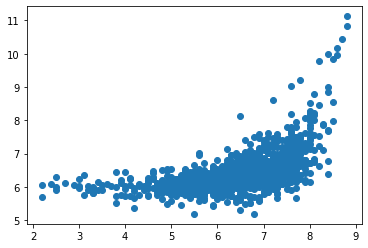

In [11]:
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)

A baixo temos métricas de loss function:

*   **MAE** é a média do valor absoluto dos erros
*   **MSE** é a média dos erros ao quadrado
*   **RMSE** é a raiz quadrada da média dos erros ao quadrado









In [12]:
print('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE:  0.5762947474549113
MSE:  0.6070416388962212
RMSE:  0.7791287691365408


Quanto menor as métricas forem melhor o nosso modelo foi. De acordo com a métrica a cima podemos ver que nosso modelo foi bem, pois são métricas baixas.